In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
class hyperPlane():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        Nfeatures, Ndata = np.shape(X)[0], np.shape(X)[1]
        self.theta = np.zeros(Nfeatures)
        self.h = np.zeros(Ndata)
        self.J = 1.
        self.grad = 1.

        self.Niter = 100
        self.JHist = np.zeros(self.Niter)

    def computeLinearRegretion(self):
        self.theta = np.random.random(3)

        i = 0
        while((np.dot(self.grad,self.grad) > 1e-8) and (i < self.Niter)):
            self.model()
            self.costo()
            self.JHist[i] = self.J
            self.update_params(0.01)
            i += 1
        
        self.JHist = self.JHist[:i]
    
    def model(self):
        self.h = self.theta.T@self.X
    
    def costo(self):
        self.J = np.mean((self.h - self.Y)**2)
    
    def update_params(self, learningRate):
        self.grad = np.dot((self.h - self.Y) ,self.X.T).T
        self.theta = self.theta - learningRate*self.grad
    
    def plot(self):
        plt.plot(self.JHist)
        plt.show()

In [10]:
N = 100
x_1 = 2 * np.random.random(N) - 1
x_2 = 2 * np.random.random(N) - 1

y_label = 2.1 * x_1 - 3.1 * x_2 #+ 0.2*(2*np.random.random(N)-1)
df = pd.DataFrame({"x1":x_1, "x2":x_2, "y":y_label})
df["ones"]=1

X = df[['ones', 'x1', 'x2']].values.T
Y = df['y']

In [24]:
firstTrie = hyperPlane(X,Y)

firstTrie.computeLinearRegretion()  

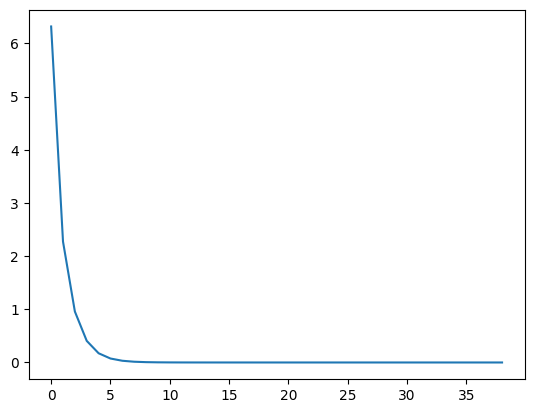

In [25]:
firstTrie.plot()

In [26]:
print('Los valores de theta son:')

print(firstTrie.theta)

Los valores de theta son:
[ 1.85508553e-08  2.09999826e+00 -3.10000011e+00]


$$
\theta_0 = 0.0 \\
\theta_1 = 2.1 \\
\theta_2 = -3.1 \\
$$